<i><h1 style="text-align:center;color:#FFFFF"> Prueba Fundamentos Data Science</h1></i>
<i><h3 style="text-align:center;color:#FFFFF">Desafío Determinantes del ingreso </h3></i></i>
<i><h3 style="text-align:center;color:#FFFFF">Por : Christian Vergara Retamal </h3></i></i>

## Preliminares

<div style="text-align: justify"> El contexto del problema está basado principalmente en la observación de las diversas características que poseen un grupo de individuos dentro de una población (muestra), las cuales son determinantes (o no) de su situación socioeconómica, reflejada en sus ingresos. El objetivo de la investigación recae en analizar dichas variables con el propósito de generar un modelo predictivo, el cuál nos permita obtener la probabilidad de que un individuo cualquiera, presente un ingreso anual bajo o sobre un monto, específicamente acordado en 50000 dolares anuales. Dicho esto, podemos interpretar, a raíz de que la predicción objetivo de la investigación es sobre una variable categórica, es decir, predecir si el salario de un individuo será sobre o bajo 50000 dólares, que será necesario ocupar <strong>regresión logística</strong> para abordar la investigación.</div>

## Aspectos

**Librerías utilizadas para el funcionamiento del notebook**
* numpy versión 1.19.2 : Álgebra lineal y matemáticas
* pandas versión 1.2.2 : Manejo y análisis de estructuras de datos
* scipy versión 1.6.1 : Herramientas y algoritmos matemáticos
* statsmodels 0.12.2 : Estadística clásica
* seaborn versión 0.11.1 : Visualización de gráficos
* scikit-learn versión 0.24.1 : Machine Learning
* matplotlib versión 3.3.4 : Gráficos

## Descripción

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report, roc_curve, roc_auc_score
import aux_functions as af
from pandas_profiling import ProfileReport


In [2]:
plt.style.use('seaborn-whitegrid')
plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams["figure.dpi"] = 75 

In [3]:
# Leemos el archivo csv con los datos
df = pd.read_csv("income-db.csv")

In [5]:
prof = ProfileReport(df)

In [6]:
prof

Summarize dataset:   0%|          | 0/28 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
# Observamos los primeros registros del dataset
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [5]:
# Observamos los últimos registros del dataset
df.tail()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [6]:
shape = df.shape

In [7]:
print("El dataframe consta de {} columnas y {} registros".format(shape[1], shape[0]))

El dataframe consta de 15 columnas y 48842 registros


In [8]:
# Mediante df.columns, podemos observar los nombres de las columnas de nuestro dataframe
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [9]:
# Con el método info() de dataframe, podemos observar información extra acerca de cada una de las columnas
# que contiene nuestro dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


**De acuerdo a la información que nos proporciona df.info(), podemos observar los siguiente:** 
* Tenemos 6 columnas o atributos los cuales son de tipo (DType) int64
* 9 de los atributos son de tipo object

In [10]:
# Modificamos la cantidad de decimales que muestra pandas en los datos tipo 'float', especificando solo 4
pd.options.display.float_format = "{:.4f}".format

In [11]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.0000,48842.0000,48842.0000,48842.0000,48842.0000,48842.0000
mean,38.6436,189664.1346,10.0781,1079.0676,87.5023,40.4224
std,13.7105,105604.0254,2.5710,7452.0191,403.0046,12.3914
min,17.0000,12285.0000,1.0000,0.0000,0.0000,1.0000
25%,28.0000,117550.5000,9.0000,0.0000,0.0000,40.0000
50%,37.0000,178144.5000,10.0000,0.0000,0.0000,40.0000
75%,48.0000,237642.0000,12.0000,0.0000,0.0000,45.0000
max,90.0000,1490400.0000,16.0000,99999.0000,4356.0000,99.0000



* Con el método describe(), podemos observar algunas carcterísticas estadísticas básicas de los atributos numéricos que contiene el dataframe, tales como la cantidad de registros para cada atributo, quartiles, máximos y mínimos y algunas medidas de tendencia central

In [12]:
# incluimos las variables no numéricas o categoricas y observamos, a través del método describe(), sus características generales
df.describe(include=['object'])

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,48842,48842,48842,48842,48842,48842,48842,48842,48842
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,37155


* En este caso, observamos diversas características de las variables categóricas, tales como la cantidad de registros para cada atributo, los diversos valores únicos que puede tomar cada atributoy  el valor dentro de la o las categorías con más frecuencia, incluida la cantidad de ocurrencias

In [13]:
# Observamos la aparición de valores nulos en el dataset
df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

### Analizamos cada una de las variables categóricas de nuestro dataset

#### **workclass** : *naturaleza de la organización que emplea al individuo*

In [14]:
df['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [15]:
df['workclass'] = df['workclass'].replace('?',np.nan)

In [16]:
# Recodificación de valores en columna workclass
df["workclass"] = np.where(df["workclass"] == "Federal-gov", "federal-gov", df["workclass"])
df["workclass"] = np.where(df["workclass"] == "State-gov", "state-level-gov", df["workclass"])
df["workclass"] = np.where(df["workclass"] == "Local-gov", "state-level-gov", df["workclass"])
df["workclass"] = np.where(df["workclass"] == "Self-emp-inc", "self-employed", df["workclass"])
df["workclass"] = np.where(df["workclass"] == "Self-emp-not-inc", "self-employed", df["workclass"])
df["workclass"] = np.where(df["workclass"] == "Never-worked", "unemployed", df["workclass"])
df["workclass"] = np.where(df["workclass"] == "Without-pay", "unemployed", df["workclass"])

In [17]:
df.rename(columns = {"workclass" : "workclass_recod"}, inplace = True)

In [18]:
# Observamos la frecuencia de valores de la columna workclass ya recodificada
df['workclass_recod'].value_counts()

Private            33906
self-employed       5557
state-level-gov     5117
federal-gov         1432
unemployed            31
Name: workclass_recod, dtype: int64

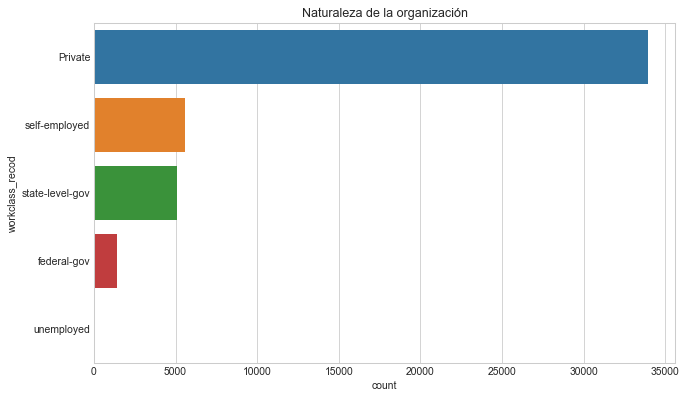

In [19]:
af.plot_count_custom(df, 'workclass_recod', 'Naturaleza de la organización', 'y')

------

#### **education** : *Nivel educacional del individuo*

In [20]:
df['education'].value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

In [21]:
# Recodificamos los valores de la columna 'education'
df["education"] = np.where(df["education"] == "Preschool", "preschool", df["education"])
df["education"] = np.where(df["education"] == "1st-4th", "elementary-school", df["education"])
df["education"] = np.where(df["education"] == "5th-6th", "elementary-school", df["education"])
df["education"] = np.where(df["education"] == "7th-8th", "high-school", df["education"])
df["education"] = np.where(df["education"] == "9th", "high-school", df["education"])
df["education"] = np.where(df["education"] == "10th", "high-school", df["education"])
df["education"] = np.where(df["education"] == "11th", "high-school", df["education"])
df["education"] = np.where(df["education"] == "12th", "high-school", df["education"])
df["education"] = np.where(df["education"] == "HS-grad", "high-school", df["education"])
df["education"] = np.where(df["education"] == "Assoc-voc", "college", df["education"])
df["education"] = np.where(df["education"] == "Assoc-acdm", "college", df["education"])
df["education"] = np.where(df["education"] == "Some-college", "college", df["education"])
df["education"] = np.where(df["education"] == "Bachelors", "university", df["education"])
df["education"] = np.where(df["education"] == "Masters", "university", df["education"])
df["education"] = np.where(df["education"] == "Prof-school", "university", df["education"])
df["education"] = np.where(df["education"] == "Doctorate", "university", df["education"])

In [22]:
df.rename(columns = {"education" : "education_recod"}, inplace = True)

In [23]:
#Observamos la columna education, ya realizado el proceso de recodificación
df["education_recod"].value_counts()

high-school          21353
college              14540
university           12110
elementary-school      756
preschool               83
Name: education_recod, dtype: int64

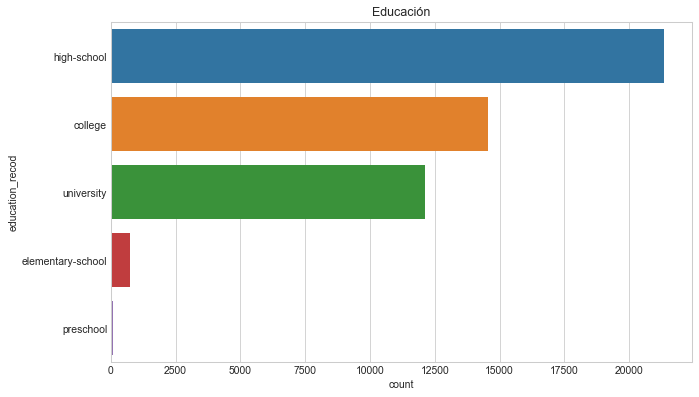

In [24]:
af.plot_count_custom(df, 'education_recod', 'Educación', 'y')

------

#### **marital-status** : *estado civil del individuo*

In [25]:
df["marital-status"].value_counts()

Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64

In [26]:
df["marital-status"] = np.where(df["marital-status"] == "Married-civ-spouse", "married", df["marital-status"])
df["marital-status"] = np.where(df["marital-status"] == "Married-spouse-absent", "married", df["marital-status"])
df["marital-status"] = np.where(df["marital-status"] == "Married-AF-spouse", "married", df["marital-status"])
df["marital-status"] = np.where(df["marital-status"] == "Divorced", "divorced", df["marital-status"])
df["marital-status"] = np.where(df["marital-status"] == "Separated", "separated", df["marital-status"])
df["marital-status"] = np.where(df["marital-status"] == "Widowed", "widowed", df["marital-status"])
df["marital-status"] = np.where(df["marital-status"] == "Never-married", "never-married", df["marital-status"])

In [27]:
df.rename(columns = {"marital-status" : "civstatus"}, inplace = True)

In [28]:
df["civstatus"].value_counts()

married          23044
never-married    16117
divorced          6633
separated         1530
widowed           1518
Name: civstatus, dtype: int64

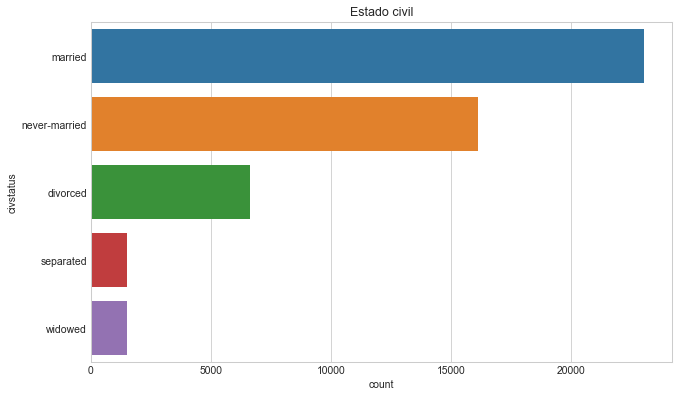

In [29]:
af.plot_count_custom(df, 'civstatus', 'Estado civil', 'y')

------

#### **occupation** : *Ocupación del individuo*

In [30]:
df["occupation"].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [31]:
df['occupation'] = df['occupation'].replace('?',np.nan)

In [32]:
df["occupation"] = np.where(df["occupation"] == "Prof-specialty", "white-collar", df["occupation"])
df["occupation"] = np.where(df["occupation"] == "Exec-managerial", "white-collar", df["occupation"])
df["occupation"] = np.where(df["occupation"] == "Adm-clerical", "white-collar", df["occupation"])
df["occupation"] = np.where(df["occupation"] == "Sales", "white-collar", df["occupation"])
df["occupation"] = np.where(df["occupation"] == "Tech-support", "blue-collar", df["occupation"])
df["occupation"] = np.where(df["occupation"] == "Craft-repair", "blue-collar", df["occupation"])
df["occupation"] = np.where(df["occupation"] == "Machine-op-inspct", "blue-collar", df["occupation"])
df["occupation"] = np.where(df["occupation"] == "Transport-moving", "blue-collar", df["occupation"])
df["occupation"] = np.where(df["occupation"] == "Handlers-cleaners", "blue-collar", df["occupation"])
df["occupation"] = np.where(df["occupation"] == "Farming-fishing", "blue-collar", df["occupation"])
df["occupation"] = np.where(df["occupation"] == "Protective-serv", "blue-collar", df["occupation"])
df["occupation"] = np.where(df["occupation"] == "Priv-house-serv", "blue-collar", df["occupation"])
df["occupation"] = np.where(df["occupation"] == "Other-service", "others", df["occupation"])
df["occupation"] = np.where(df["occupation"] == "Armed-Forces", "others", df["occupation"])

In [33]:
df["occupation"].value_counts()

white-collar    23373
blue-collar     17722
others           4938
Name: occupation, dtype: int64

In [34]:
df.rename(columns = {"occupation" : "collars"}, inplace = True)

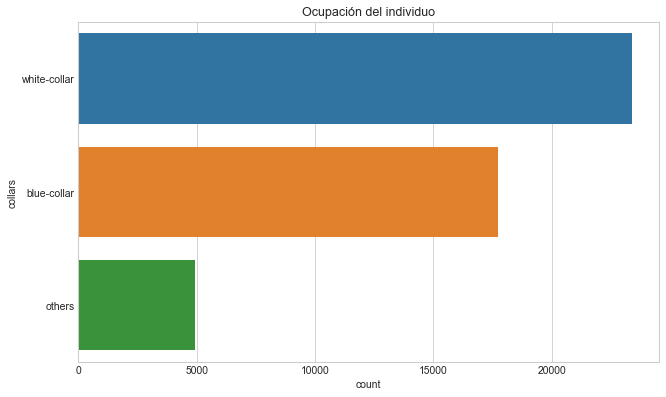

In [35]:

af.plot_count_custom(df, 'collars', 'Ocupación del individuo', 'y')

------

#### relationship

In [36]:
df["relationship"].value_counts()

Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: relationship, dtype: int64

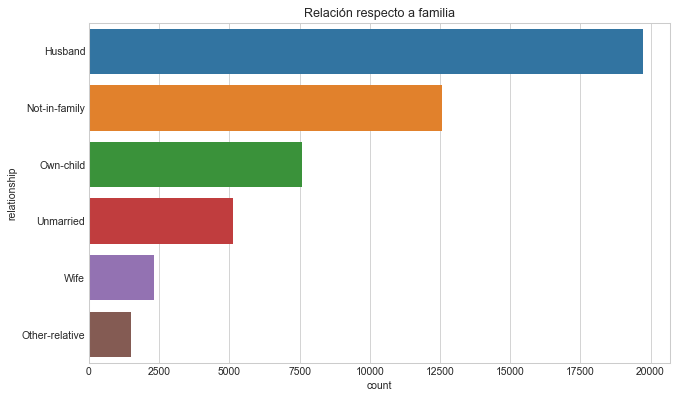

In [37]:
sns.countplot(y="relationship", data=df, order = df['relationship'].value_counts().index)
af.plot_count_custom(df, 'relationship', 'Relación respecto a familia', 'y')

------

#### race

In [38]:
df["race"].value_counts()

White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

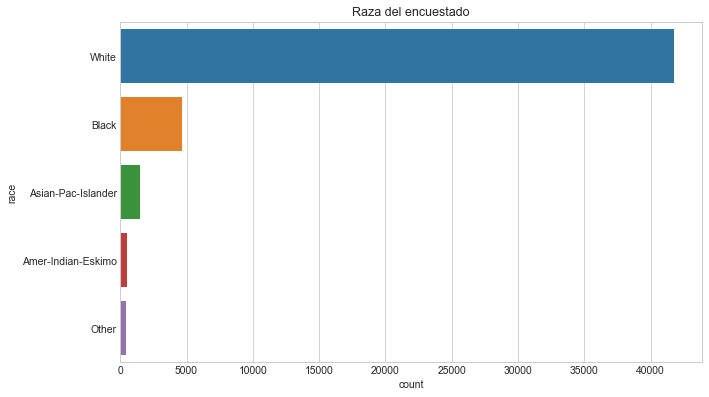

In [39]:
af.plot_count_custom(df, 'race', 'Raza del encuestado', 'y')

------

#### gender

In [40]:
df["gender"].value_counts()

Male      32650
Female    16192
Name: gender, dtype: int64

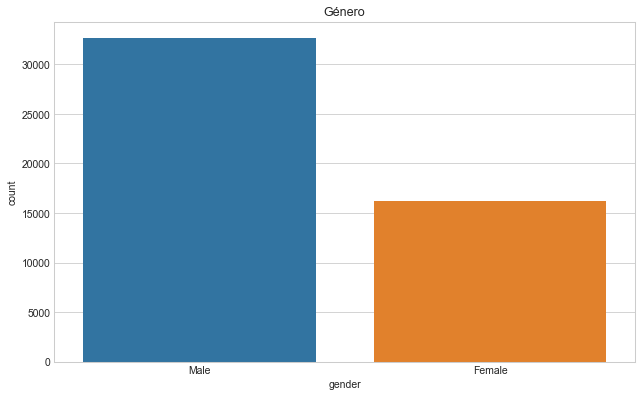

In [41]:
af.plot_count_custom(df, 'gender', 'Género', 'x')

------

#### native-country

In [42]:
df['native-country'] = df['native-country'].replace('?',np.nan)

In [43]:
df['native-country'] = df['native-country'].replace(['United-States','Peru',
 'Guatemala',
 'Mexico',
 'Dominican-Republic', 'Haiti',
 'El-Salvador',
 'Puerto-Rico','Columbia', 'Cuba', 'Canada','Nicaragua',
 'Honduras', 'Jamaica',
 'Ecuador', 'Trinadad&Tobago',
 'Outlying-US(Guam-USVI-etc)',], 'America')

In [44]:
df['native-country'] = df['native-country'].replace(['Philippines',
 'Thailand', 'Vietnam', 'Japan',
 'India',
 'Cambodia', 'Laos', 'Taiwan', 'China', 'Iran', 'Hong'],'Asia')

In [45]:
df['native-country'] = df['native-country'].replace(['Ireland',
 'Germany', 'Poland', 'England', 'Italy', 'Portugal','Scotland', 'Yugoslavia',
 'Hungary','Greece', 'France',
 'Holand-Netherlands'], 'Europa')

In [46]:
df['native-country'] = df['native-country'].replace(['South'], 'Africa')

In [47]:
df = df.rename(columns = {"native-country" : "region"})

In [48]:
df['region'].value_counts()

America    46109
Asia         981
Europa       780
Africa       115
Name: region, dtype: int64

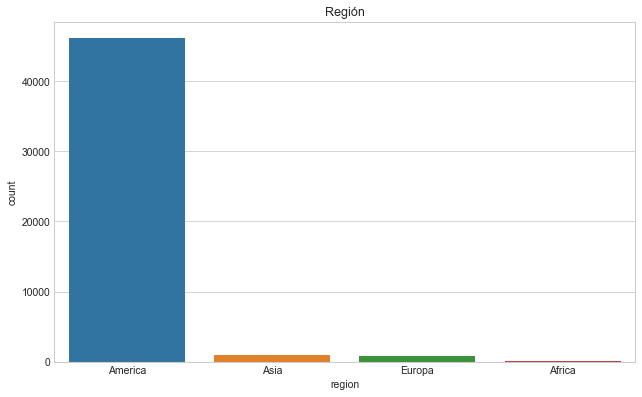

In [49]:
af.plot_count_custom(df, 'region', 'Región', 'x')

------

#### income

Es importante el tratamiento de la variable income, debido a que en nuestro modelo, esta corresponderá a unuestra variable objetivo

In [50]:
df['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [51]:
# Recodificamos la variable income
df = af.createDummies(df, 'income')

In [52]:
df["income_>50K"].value_counts()

0    37155
1    11687
Name: income_>50K, dtype: int64

------

In [53]:
df.isna().sum()

age                   0
workclass_recod    2799
fnlwgt                0
education_recod       0
educational-num       0
civstatus             0
collars            2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
region              857
income_>50K           0
dtype: int64

In [54]:
new_df = df.copy()

In [55]:
new_df.dropna(inplace = True)

In [56]:
new_df.shape

(45222, 15)

In [57]:
new_df.columns

Index(['age', 'workclass_recod', 'fnlwgt', 'education_recod',
       'educational-num', 'civstatus', 'collars', 'relationship', 'race',
       'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'region',
       'income_>50K'],
      dtype='object')

In [58]:
new_df.head()

,age,workclass_recod,fnlwgt,education_recod,educational-num,civstatus,collars,relationship,race,gender,capital-gain,capital-loss,hours-per-week,region,income_>50K
0,25,Private,226802,high-school,7,never-married,blue-collar,Own-child,Black,Male,0,0,40,America,0
1,38,Private,89814,high-school,9,married,blue-collar,Husband,White,Male,0,0,50,America,0
2,28,state-level-gov,336951,college,12,married,blue-collar,Husband,White,Male,0,0,40,America,1
3,44,Private,160323,college,10,married,blue-collar,Husband,Black,Male,7688,0,40,America,1
5,34,Private,198693,high-school,6,never-married,others,Not-in-family,White,Male,0,0,30,America,0


### Creación de Dummies

In [59]:
new_df = af.createDummies(new_df, 'workclass_recod')
new_df = af.createDummies(new_df, 'education_recod')
new_df = af.createDummies(new_df, 'civstatus')
new_df = af.createDummies(new_df, 'collars')
new_df = af.createDummies(new_df, 'relationship')
new_df = af.createDummies(new_df, 'race')
new_df = af.createDummies(new_df, 'gender')
new_df = af.createDummies(new_df, 'region')

In [60]:
new_df.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income_>50K,workclass_recod_federal-gov,workclass_recod_self-employed,workclass_recod_state-level-gov,...,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Male,region_America,region_Asia,region_Europa
0,25,226802,7,0,0,40,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0
1,38,89814,9,0,0,50,0,0,0,0,...,0,0,0,0,0,1,1,1,0,0
2,28,336951,12,0,0,40,1,0,0,1,...,0,0,0,0,0,1,1,1,0,0
3,44,160323,10,7688,0,40,1,0,0,0,...,0,0,0,1,0,0,1,1,0,0
5,34,198693,6,0,0,30,0,0,0,0,...,0,0,0,0,0,1,1,1,0,0


## Modelación descriptiva

In [61]:
new_df.columns = new_df.columns.str.replace('-', '_')

In [62]:
new_df.columns

Index(['age', 'fnlwgt', 'educational_num', 'capital_gain', 'capital_loss',
       'hours_per_week', 'income_>50K', 'workclass_recod_federal_gov',
       'workclass_recod_self_employed', 'workclass_recod_state_level_gov',
       'workclass_recod_unemployed', 'education_recod_elementary_school',
       'education_recod_high_school', 'education_recod_preschool',
       'education_recod_university', 'civstatus_married',
       'civstatus_never_married', 'civstatus_separated', 'civstatus_widowed',
       'collars_others', 'collars_white_collar', 'relationship_Not_in_family',
       'relationship_Other_relative', 'relationship_Own_child',
       'relationship_Unmarried', 'relationship_Wife',
       'race_Asian_Pac_Islander', 'race_Black', 'race_Other', 'race_White',
       'gender_Male', 'region_America', 'region_Asia', 'region_Europa'],
      dtype='object')

In [63]:
variables = ' + '.join(list(new_df.loc[:, ~new_df.columns.isin(['income_>50K'])]))

In [64]:
variables

'age + fnlwgt + educational_num + capital_gain + capital_loss + hours_per_week + workclass_recod_federal_gov + workclass_recod_self_employed + workclass_recod_state_level_gov + workclass_recod_unemployed + education_recod_elementary_school + education_recod_high_school + education_recod_preschool + education_recod_university + civstatus_married + civstatus_never_married + civstatus_separated + civstatus_widowed + collars_others + collars_white_collar + relationship_Not_in_family + relationship_Other_relative + relationship_Own_child + relationship_Unmarried + relationship_Wife + race_Asian_Pac_Islander + race_Black + race_Other + race_White + gender_Male + region_America + region_Asia + region_Europa'

In [65]:
new_df = new_df.rename(columns = {"income_>50K" : "income_sup50"})

In [66]:
m1_logit = smf.logit('income_sup50  ~ age + fnlwgt + educational_num + capital_gain + capital_loss + hours_per_week + workclass_recod_federal_gov + workclass_recod_self_employed + workclass_recod_state_level_gov + workclass_recod_unemployed + education_recod_elementary_school + education_recod_high_school + education_recod_preschool + education_recod_university + civstatus_married + civstatus_never_married + civstatus_separated + civstatus_widowed + collars_others + collars_white_collar + relationship_Not_in_family + relationship_Other_relative + relationship_Own_child + relationship_Unmarried + relationship_Wife + race_Asian_Pac_Islander + race_Black + race_Other + race_White + gender_Male + region_America + region_Asia + region_Europa', data = new_df).fit()

Optimization terminated successfully.
         Current function value: 0.332294
         Iterations 11


In [67]:
m1_logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           income_sup50   No. Observations:                45222
Model:                          Logit   Df Residuals:                    45188
Method:                           MLE   Df Model:                           33
Date:                Sun, 28 Mar 2021   Pseudo R-squ.:                  0.4066
Time:                        01:49:11   Log-Likelihood:                -15027.
converged:                       True   LL-Null:                       -25322.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -9.6256      0.489    -19.688      0.000     -10.584      -8.667
age                                   0.0253      0.001     18.699      0.000       0.023       0.028
fnlwgt                             7.312e-07    1.4e-07      5.227      0.000    4.57e-07    1.01e-06
educational_num                       0.2818      0.016     17.590      0.000       0.250       0.313
capital_gain                          0.0003    8.6e-06     36.946      0.000       0.000       0.000
capital_loss                          0.0007   3.07e-05     21.374      0.000       0.001       0.001
hours_per_week                        0.0294      0.001     22.273      0.000       0.027       0.032
workclass_recod_federal_gov           0.4731      0.075      6.306      0.000       0.326       0.620
workclass_recod_self_employed        -0.3477      0.042     -8.227      0.000      -0.430      -0.265
workclass_recod_state_level_gov      -0.0853      0.046     -1.859      0.063      -0.175       0.005
workclass_recod_unemployed           -1.1302      0.801     -1.412      0.158      -2.699       0.439
education_recod_elementary_school     0.1206      0.237      0.509      0.611      -0.344       0.585
education_recod_high_school          -0.0925      0.047     -1.986      0.047      -0.184      -0.001
education_recod_preschool            -4.0044      4.054     -0.988      0.323     -11.951       3.942
education_recod_university            0.0848      0.061      1.393      0.164      -0.035       0.204
civstatus_married                     0.7839      0.138      5.665      0.000       0.513       1.055
civstatus_never_married              -0.4842      0.072     -6.706      0.000      -0.626      -0.343
civstatus_separated                  -0.0290      0.133     -0.218      0.828      -0.290       0.232
civstatus_widowed                     0.0880      0.128      0.688      0.492      -0.163       0.339
collars_others                       -0.7992      0.087     -9.234      0.000      -0.969      -0.630
collars_white_collar                  0.5131      0.034     14.962      0.000       0.446       0.580
relationship_Not_in_family           -0.9759      0.134     -7.289      0.000      -1.238      -0.714
relationship_Other_relative          -1.4352      0.187     -7.664      0.000      -1.802      -1.068
relationship_Own_child               -1.9568      0.166    -11.756      0.000      -2.283      -1.631
relationship_Unmarried               -1.2053      0.150     -8.016      0.000      -1.500      -0.911
relationship_Wife                     1.0710      0.084     12.728      0.000       0.906       1.236
race_Asian_Pac_Islander               0.8490      0.223      3.810      0.000       0.412       1.286
race_Black                            0.2694      0.189      1.426      0.154      -0.101       0.640
race_Other                            0.2414      0.272      0.888      0.375  

In [68]:
aux_dict = m1_logit.pvalues.to_dict()

In [69]:
aux_list = []
for key, value in aux_dict.items():
    if value < 0.05:
        aux_list.append(key)

In [70]:
aux_list2 = ' + '.join(aux_list)
aux_list2

'Intercept + age + fnlwgt + educational_num + capital_gain + capital_loss + hours_per_week + workclass_recod_federal_gov + workclass_recod_self_employed + education_recod_high_school + civstatus_married + civstatus_never_married + collars_others + collars_white_collar + relationship_Not_in_family + relationship_Other_relative + relationship_Own_child + relationship_Unmarried + relationship_Wife + race_Asian_Pac_Islander + race_White + gender_Male + region_America + region_Asia + region_Europa'

In [71]:
m1_logit_depurado = smf.logit('income_sup50 ~ age + fnlwgt + educational_num + capital_gain + capital_loss + hours_per_week + workclass_recod_federal_gov + workclass_recod_self_employed + education_recod_high_school + civstatus_married + civstatus_never_married + collars_others + collars_white_collar + relationship_Not_in_family + relationship_Other_relative + relationship_Own_child + relationship_Unmarried + relationship_Wife + race_Asian_Pac_Islander + race_White + gender_Male + region_America + region_Asia + region_Europa', data = new_df).fit()

Optimization terminated successfully.
         Current function value: 0.332452
         Iterations 9


In [72]:
m1_logit_depurado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           income_sup50   No. Observations:                45222
Model:                          Logit   Df Residuals:                    45197
Method:                           MLE   Df Model:                           24
Date:                Sun, 28 Mar 2021   Pseudo R-squ.:                  0.4063
Time:                        01:49:12   Log-Likelihood:                -15034.
converged:                       True   LL-Null:                       -25322.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -9.5049      0.440    -21.616      0.000     -10.367      -8.643
age                               0.0254      0.001     19.035      0.000       0.023       0.028
fnlwgt                         7.535e-07   1.39e-07      5.416      0.000    4.81e-07    1.03e-06
educational_num                   0.2943      0.009     31.643      0.000       0.276       0.313
capital_gain                      0.0003   8.58e-06     36.970      0.000       0.000       0.000
capital_loss                      0.0007   3.07e-05     21.427      0.000       0.001       0.001
hours_per_week                    0.0294      0.001     22.300      0.000       0.027       0.032
workclass_recod_federal_gov       0.4848      0.074      6.509      0.000       0.339       0.631
workclass_recod_self_employed    -0.3349      0.042     -8.052      0.000      -0.416      -0.253
education_recod_high_school      -0.0853      0.042     -2.009      0.045      -0.169      -0.002
civstatus_married                 0.7787      0.136      5.725      0.000       0.512       1.045
civstatus_never_married          -0.4818      0.068     -7.046      0.000      -0.616      -0.348
collars_others                   -0.7978      0.087     -9.220      0.000      -0.967      -0.628
collars_white_collar              0.5189      0.034     15.232      0.000       0.452       0.586
relationship_Not_in_family       -0.9752      0.134     -7.293      0.000      -1.237      -0.713
relationship_Other_relative      -1.4322      0.187     -7.647      0.000      -1.799      -1.065
relationship_Own_child           -1.9596      0.166    -11.791      0.000      -2.285      -1.634
relationship_Unmarried           -1.2076      0.150     -8.042      0.000      -1.502      -0.913
relationship_Wife                 1.0658      0.084     12.713      0.000       0.901       1.230
race_Asian_Pac_Islander           0.6145      0.144      4.269      0.000       0.332       0.897
race_White                        0.2859      0.058      4.969      0.000       0.173       0.399
gender_Male                       0.7621      0.064     11.954      0.000       0.637       0.887
region_America                    1.4712      0.381      3.861      0.000       0.724       2.218
region_Asia                       1.0233      0.370      2.763      0.006       0.297       1.749
region_Europa                     1.6844      0.395      4.266      0.000       0.911       2.458
=================================================================================================
"""

In [73]:
af.concise_summary(m1_logit_depurado)


Goodness of Fit Statistics
         Statistics       Value
2             BIC:  30336.2754
3  Log-Likelihood:     -15034.
4         LL-Null:     -25322.
5     LLR p-value:      0.0000
6           Scale:      1.0000
7                             

Point Estimates

                                 Coef.  Std.Err.
Intercept                     -9.5049    0.4397
age                            0.0254    0.0013
fnlwgt                         0.0000    0.0000
educational_num                0.2943    0.0093
capital_gain                   0.0003    0.0000
capital_loss                   0.0007    0.0000
hours_per_week                 0.0294    0.0013
workclass_recod_federal_gov    0.4848    0.0745
workclass_recod_self_employed -0.3349    0.0416
education_recod_high_school   -0.0853    0.0425
civstatus_married              0.7787    0.1360
civstatus_never_married       -0.4818    0.0684
collars_others                -0.7978    0.0865
collars_white_collar           0.5189    0.0341
relationship_No

## Modelación predictiva

In [74]:
# refactorizamos nuestro df, creando uno nuevo 'df_predictivo', utilizando solo las variables más significativas
# en nuestro modelo, las cuales obtuvimos a través de la modelación descriptiva (econometría)
df_predictivo = new_df[['age','fnlwgt','educational_num','capital_gain','capital_loss',
 'hours_per_week',
 'workclass_recod_federal_gov',
 'workclass_recod_self_employed',
 'education_recod_high_school',
 'civstatus_married',
 'civstatus_never_married',
 'collars_others',
 'collars_white_collar','relationship_Not_in_family','relationship_Other_relative','relationship_Own_child','relationship_Unmarried','relationship_Wife', 'race_Asian_Pac_Islander','race_White','gender_Male','region_America','region_Asia','region_Europa', 'income_sup50']]

In [75]:
# Observamos los primeros registros de nuestro nuevo dataset
df_predictivo.head()

,age,fnlwgt,educational_num,capital_gain,capital_loss,hours_per_week,workclass_recod_federal_gov,workclass_recod_self_employed,education_recod_high_school,civstatus_married,...,relationship_Own_child,relationship_Unmarried,relationship_Wife,race_Asian_Pac_Islander,race_White,gender_Male,region_America,region_Asia,region_Europa,income_sup50
0,25,226802,7,0,0,40,0,0,1,0,...,1,0,0,0,0,1,1,0,0,0
1,38,89814,9,0,0,50,0,0,1,1,...,0,0,0,0,1,1,1,0,0,0
2,28,336951,12,0,0,40,0,0,0,1,...,0,0,0,0,1,1,1,0,0,1
3,44,160323,10,7688,0,40,0,0,0,1,...,0,0,0,0,0,1,1,0,0,1
5,34,198693,6,0,0,30,0,0,1,0,...,0,0,0,0,1,1,1,0,0,0


In [76]:
# Creamos los vectores, separando la variable objetivo del resto del dataset
new_X_mat = df_predictivo.loc[:, 'age':'region_Europa']
new_y_vect = df_predictivo.loc[:, 'income_sup50']

In [77]:
# Dividimos nuestro dataset en conjunto de entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(new_X_mat, new_y_vect, test_size=.33, random_state=77)

In [78]:
# Estandarizamos la matriz de entrenamiento
X_train_std = StandardScaler().fit_transform(X_train)
# Estandarizamos la matriz de testeo
X_test_std = StandardScaler().fit_transform(X_test)

In [79]:
# Aplicamos regresion logistica a nuestro modelo
modelo = LogisticRegression().fit(X_train_std, y_train)

In [80]:
# Solicitamos los coeficientes del modelo
modelo.coef_

array([[ 0.33189392,  0.07334448,  0.74770463,  2.25615568,  0.28008112,
         0.36022415,  0.06975704, -0.1050703 , -0.04322225,  0.38614374,
        -0.2090548 , -0.24523937,  0.25210031, -0.453375  , -0.29147335,
        -0.7201486 , -0.3836611 ,  0.22210805,  0.10037851,  0.09999496,
         0.35594433,  0.31063786,  0.19262319,  0.22544796]])

* Observamos que los coeficientes son diferentes a los estimados con el modelo econométrico, dicha diferencia recae en el proceso de estandarización que realizamos en la modelación predictiva (Machine Learning)

In [81]:
y_hat = modelo.predict(X_test_std)

In [82]:
# Creamos la matriz de confusion para nuestro modelo
confusionMatrix_modelo = confusion_matrix(y_test, y_hat)

In [83]:
confusionMatrix_modelo

array([[10352,   814],
       [ 1533,  2225]])

In [84]:
# Utilizamos crosstab para comparar
confusionMatrix_modelo_ct = pd.crosstab(y_test, y_hat)
confusionMatrix_modelo_ct

col_0,0,1
income_sup50,,
0,10352,814
1,1533,2225


* La tabla anterior permite identificar las categorías predichas con las observadas. Mediante la diagonal pricipal, podemos observar los casos exitosamente predichos

In [85]:
# Aplicamos el método accuracy_score, el cual retorna un valor entre 0 y 1, donde valores más alto reflejan mayores
# niveles de concordancia entre los vectores y_test e y_hat
modelo_accuracy = accuracy_score(y_test, y_hat)
modelo_accuracy

0.842736531760922

* La predicción (accuracy) del modelo es 84.3 %, por lo tanto el modelo tiene un desempeño de un ~34% superior que una predicción azarosa

In [86]:
# Utilizamos dos medidas 'Precision' y 'Recall' para evaluar el desempeño del modelo
modelo_precision = precision_score(y_test, y_hat) # Proporcion de identificaciones positivas correctas?
modelo_recall = recall_score(y_test, y_hat) # Proporción de postivos reales se identificaron correctamente?
print("Precision del modelo: ", modelo_precision, "\nRecall (sensibilidad) del modelo: ", modelo_recall)

Precision del modelo:  0.7321487331359 
Recall (sensibilidad) del modelo:  0.5920702501330495


* Observamos, mediante los puntajes precisión y recall, que el modelo tiene un desempeño aceptable. Por otra parte, es recomendable utilizar la métrica F1, la cual representa la media armónica entre Precision y Recall, esta medidas penaliza de mayor manera los valores bajos.

$$
F1 = \frac{2 \times Precision \times Recall}{Precision + Recall}
$$


In [87]:
# Utilizamos el método classification_report de sklearn, reportando las medidas de precision, recall y F1
modelo_classification_report = classification_report(y_test, y_hat)
print(modelo_classification_report)

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     11166
           1       0.73      0.59      0.65      3758

    accuracy                           0.84     14924
   macro avg       0.80      0.76      0.78     14924
weighted avg       0.84      0.84      0.84     14924



El método classification_report del módulo metrics de sklearn, nos proporciona diversas métricas clave para un modelo de regresión logística (contexto de clasificación), de lo cual obtenemos los siguiente :
* Precision : Cuantos de la clase (0 y 1) están correctamente clasificados (proporción).
    * Ingreso inferior a 50K USD (0) -> 0.87
    * Ingreso superior a 50K USD (1) -> 0.73   
      
      
* Recall : Proporción de positivos reales que se identificaron de manera correcta en el modelo.
    * Ingreso inferior a 50K USD (0) -> 0.93
    * Ingreso superior a 50K USD (1) -> 0.59
    
Mediante el reporte, se observa que el modelo presenta más dificultades para clasificar correctamente los casos donde $y_{i}=1$, es decir, los casos en que el individuo presenta un ingreso superior a 50000 dolares anuales.

In [88]:
# Finalmente, con el objetivo de generar un buen modelo de clasificación, debemos considerar cual es el rango de errores
# en el modelo, para ello utlizamos la curva ROC.
yhat = modelo.predict_proba(X_test_std)[:, 1]  #Reestimamos para obtener la probabilidad entre 0 y 1
# Generamos los objetos de roc_curve
falso_positivo, verdadero_positivo, threshold = roc_curve(y_test, yhat)

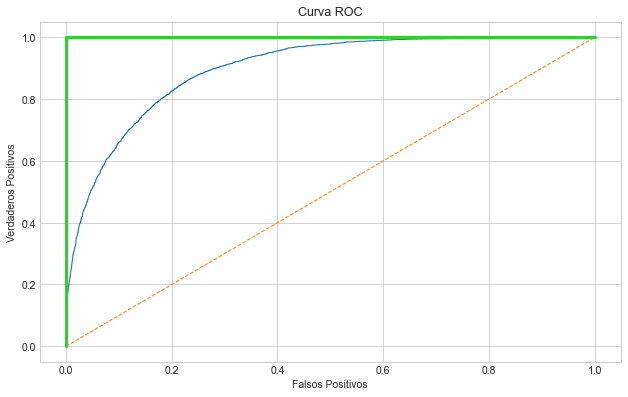

In [89]:
# Plot ROC curve
plt.title('Curva ROC')
plt.plot(falso_positivo, verdadero_positivo, lw=1)
plt.plot([0, 1], ls="--", lw=1)
plt.plot([0, 0], [1, 0] , c='limegreen', lw=3), 
plt.plot([1, 1] , c='limegreen', lw=3)
plt.ylabel('Verdaderos Positivos')
plt.xlabel('Falsos Positivos');

* Mediante la gráfica, podemos observar que l modelo tiene una capacidad predictiva adecuada, debido a que la curva ROC, coloreada en azul, se posiciona sobre la bisectriz, dado que la tasa de verdaderos positivos es mayor que la tasa de falsos positivos

In [90]:
roc_auc_score(y_test, yhat)

0.8984507061989768

* Finalmente, con el objetivo de evaluar la calidad de la curva ROC, mediante el método `roc_auc_score`, el cual nos permite estimar el área bajo la curva. Para nuestro modelo y mediante la aplicación del método sobre nuestro vector objetivo y predicciones, podemos mencionar que, con un valor de .89, nuestro modelo tiene un desempeño 39% superior a un mecanismo de clasificación aleatoria.